# 3 NumPy 常用操作


## 1 加载图片


### 1.1 Pillow 方式

Pillow 读取的图片通道顺序是 R G B。模型训练时的通道顺序需要与预测的通道顺序保持一致。

In [8]:
# Pillow 读取图片
from PIL import Image

im = Image.open('./images/tyy.jpg')
im.size

(225, 225)

In [9]:
# 将 pil 图片转换为 NumPy 数组
import numpy as np

im_pil = np.asarray(im)
im_pil.shape

(225, 225, 3)

### 1.2 OpenCV 方式

OpenCV 读取的图片通道顺序是 B G R

In [10]:
import cv2

im_cv2 = cv2.imread('./images/tyy.jpg')
im_cv2.shape

(225, 225, 3)

## 2 切片与索引

通过切片，获取图片的每个通道:

In [11]:
c0 = im_pil[:,:,0] # 每个像素的 R 值
c1 = im_pil[:,:,1] # G
c2 = im_pil[:,:,2] # B

# 创建一个与图片相同尺寸的全 0 数组
zeros = np.zeros((im_pil.shape[0], im_pil.shape[1],1))

将刚刚提取出来的每个通道与零值数组，沿着2轴进行合并。但每个通道是二维的 shape 是 (225,225)，但零值数组的 shape 是 (255,255,1)，是三维的。所以要先将维度统一。

使用 np.newaxis 或者直接赋值来解决

In [12]:
# np.newaxis
c0 = c0[:,:,np.newaxis]
c0_3ch = np.concatenate((c0,zeros,zeros), axis=2)

# 直接赋值
c1_3ch = np.zeros(im_pil.shape)
c1_3ch[:,:,1] = c1

c2_3ch = np.zeros(im_pil.shape)
c2_3ch[:,:,2] = c2

现在可以打印这些通道

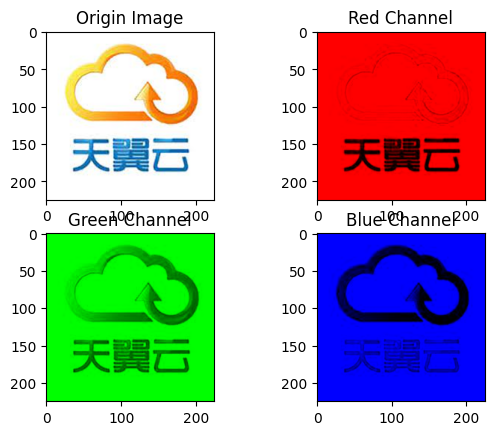

In [15]:
from matplotlib import pyplot as plt
plt.subplot(2, 2, 1)
plt.title('Origin Image')
plt.imshow(im_pil)
plt.axis('on')
plt.subplot(2, 2, 2)
plt.title('Red Channel')
plt.imshow(c0_3ch.astype(np.uint8))
plt.axis('on')
plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(c1_3ch.astype(np.uint8))
plt.axis('on')
plt.subplot(2, 2, 4)
plt.title('Blue Channel')
plt.imshow(c2_3ch.astype(np.uint8))
plt.axis('on')
plt.savefig('./images/rgb_tty.png', dpi=150)

## 3 其他操作

### 3.1 深拷贝，浅拷贝，视图

在刚才的通道合并例子中，可以直接将读取出来的图片中的两个通道赋值为 0 来达到同样的效果。

In [19]:
im = Image.open('./images/tyy.jpg')
# np.array() 是深拷贝
im_pil = np.array(im)
im_pil[:,:,1:]=0

# 浅拷贝
im_pil = np.asarray(im)

# 视图是浅拷贝
im_pil = im_pil.view()


### 3.2 求最大 / 最小值对应的**索引**

在 NumPy 中，argmax() 函数返回**沿给定轴**的最大值的索引。它可以用于寻找数组中最大值的位置，以及在多维数组中的某个轴上沿着最大值的位置。

从下面的例子可以看出，假如参数的维度是 N， argmax /argmin 的输出结果维度是 N-1

In [20]:
# 一维数组中的最大值索引
arr1d = np.array([5, 2, 9, 7, 3])
max_index_1d = np.argmax(arr1d)
print("一维数组中的最大值索引：", max_index_1d)

# 二维数组中的最大值索引
arr2d = np.array([[5, 2, 9],
                  [7, 3, 8],
                  [1, 6, 4]])
max_index_2d_row = np.argmax(arr2d, axis=0)  # 沿着行的最大值索引
max_index_2d_col = np.argmax(arr2d, axis=1)  # 沿着列的最大值索引
print("二维数组中行的最大值索引：", max_index_2d_row)
print("二维数组中列的最大值索引：", max_index_2d_col)

一维数组中的最大值索引： 2
二维数组中行的最大值索引： [1 2 0]
二维数组中列的最大值索引： [2 2 1]


### 3.3 数组排序后返回原数组的索引

在 NumPy 中，argsort() 函数用于返回数组按升序排序后的索引数组。它返回的索引数组可以用于获取排序后的数组值，或者用于在数组中进行数据切片、筛选等操作。

In [21]:
# 一维数组排序
arr1d = np.array([5, 2, 9, 7, 3])
sorted_index_1d = np.argsort(arr1d)
print("一维数组排序后的索引：", sorted_index_1d)

# 使用排序后的索引获取数组值
sorted_arr_1d = arr1d[sorted_index_1d]
print("一维数组排序后的值：", sorted_arr_1d)

一维数组排序后的索引： [1 4 0 3 2]
一维数组排序后的值： [2 3 5 7 9]


In [24]:
# 二维数组排序
arr2d = np.array([[5, 2, 9],
                  [7, 3, 8],
                  [1, 6, 4]])
sorted_index_2d_row = np.argsort(arr2d, axis=0)  #沿着行的排序索引
sorted_index_2d_col = np.argsort(arr2d, axis=1)  # 沿着列的排序索引
print("二维数组行排序后的索引：\n", sorted_index_2d_row)
print("二维数组列排序后的索引：\n", sorted_index_2d_col)

# 使用排序后的索引获取数组值
sorted_arr_2d_row = arr2d[sorted_index_2d_row, :]
sorted_arr_2d_col = arr2d[:, sorted_index_2d_col]
print("二维数组行排序后的值：\n", sorted_arr_2d_row)
print("二维数组列排序后的值：\n", sorted_arr_2d_col)

二维数组行排序后的索引：
 [[2 0 2]
 [0 1 1]
 [1 2 0]]
二维数组列排序后的索引：
 [[1 0 2]
 [1 0 2]
 [0 2 1]]
二维数组行排序后的值：
 [[[1 6 4]
  [5 2 9]
  [1 6 4]]

 [[5 2 9]
  [7 3 8]
  [7 3 8]]

 [[7 3 8]
  [1 6 4]
  [5 2 9]]]
二维数组列排序后的值：
 [[[2 5 9]
  [2 5 9]
  [5 9 2]]

 [[3 7 8]
  [3 7 8]
  [7 8 3]]

 [[6 1 4]
  [6 1 4]
  [1 4 6]]]
